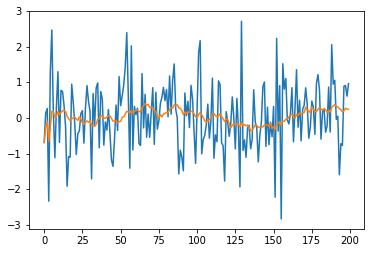

In [164]:
#Question - 1 -

%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

L=200
random_generator = [np.random.randn() for i in range(L)] 
window_lenght = 20
x = []
for i in range(len(random_generator)):
    s = 0
    n = 0
    for j in range(window_lenght):
        if i-j < 0:
            break;
        
        s = s + random_generator[i-j]
        n = n + 1
    x.append(s/n)

plt.plot(random_generator)
plt.plot(x)
plt.show()

In [162]:
#Question - 2 -

##European Bionomial - Put & Call Option

import numpy as np

r=0.05
S=100
K=120
sigma=0.05
T=5
n=100

def EuropeanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = np.exp(-sigma * np.sqrt(deltaT))
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):
        v[n][j]=max(S*u**j*d**(n-j)-K,0.0)
    for i in range(n-1, -1, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j]) 
    return v[0][0]

def EuropeanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT = T/n
    u = np.exp(sigma * np.sqrt(deltaT))
    d = np.exp(-sigma * np.sqrt(deltaT))
    a = np.exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in range(i+1)] for i in range(n+1)]
    for j in range (n+1):
        v[n][j]=max(-S*u**j*d**(n-j)+K,0.0)
    for i in range(n-1, -1, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    return v[0][0]

print("S0\tstock price at time 0:", S0)
print("K\tstrike price:", K)
print("r\tcontinuously compounded risk-free rate:", r)
print("sigma\tvolatility of the stock price per year:", sigma)
print("T\ttime to maturity in trading years:", T)
print('EuropeanBinomial')
print('Call Price',EuropeanBinomialCall(100,120,5,0.1,0.05))
print('Put Price',EuropeanBinomialPut(100,120,5,0.1,0.05))

S0	stock price at time 0: 100
K	strike price: 120
r	continuously compounded risk-free rate: 0.05
sigma	volatility of the stock price per year: 0.05
T	time to maturity in trading years: 5
EuropeanBinomial
Call Price 27.2191964254
Put Price 0.00287559087844


In [163]:
#Question - 2 -

##American Bionomial - Put & Call Option

import numpy as np

r=0.05
S=100
K=120
sigma=0.05
T=5
n=100

import numpy as np
def AmericanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d = np.exp(-sigma * np.sqrt(deltaT))
    a = np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(S*u**j * d**(n-j)-K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max((S* u**j * d**(i-j))-K,0)
            v[i][j]=max(v1,v2)
    return v[0][0]

AmericanBinomialCall(100,120,0.05,0.1,0.05)

def AmericanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d = np.exp(-sigma * np.sqrt(deltaT))
    a = np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-S*u**j * d**(n-j)+K,0.0)
    for i in range(n-1,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(-(S* u**j * d**(i-j))+K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]
AmericanBinomialPut(100,120,0.05,0.1,0.05)

print ("S0\tstock price at time 0:", S)
print ("K\tstrike price:", K)
print ("r\tcontinuously compounded risk-free rate:", r)
print ("sigma\tvolatility of the stock price per year:", sigma)
print ("T\ttime to maturity in trading years:", T)
print('AmericanBinomial')
print('Call Price',AmericanBinomialCall(100,120,5,0.1,0.05))
print('Put Price',AmericanBinomialPut(100,120,5,0.1,0.05))

S0	stock price at time 0: 100
K	strike price: 120
r	continuously compounded risk-free rate: 0.05
sigma	volatility of the stock price per year: 0.05
T	time to maturity in trading years: 5
AmericanBinomial
Call Price 27.2191964254
Put Price 20.0


In [214]:
#Question - 2 -

##Bermudan Bionomial - Put & Call Option 

import numpy as np

r=0.05
S=100
K=120
sigma=0.05
T=5
n=100

import numpy as np
#Bermudan Option Pricing
#I am constructing a Bermudan wich allows early exercising only in first 50 steps
def BermudanBinomialCall(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(S* u**j*d**(n-j)-K,0.0)
    for i in range(n-1, 50, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    for i in range(50,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max((S* u**j*d**(i-j))-K,0) 
            v[i][j]=max(v1,v2)
    
    return v[0][0]

BermudanBinomialCall(100,120,5,0.1,0.05)
def BermudanBinomialPut(S,K,T,r,sigma,n=100):
    deltaT=T/n
    u=np.exp(sigma * np.sqrt(deltaT))
    d=1.0 / u
    a =np.exp(r*deltaT)
    p=(a-d) / (u-d)
    v = [[0.0 for j in range(i + 1)] for i in range (n+1)]
    for j in range(n+1):
        v[n][j] = max(-S* u**j*d**(n-j)+K,0.0)
    for i in range(n-1, 50, -1):
        for j in range(i + 1):
            v[i][j]=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
    for i in range(50,-1,-1):
        for j in range(i + 1):
            v1=np.exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(-(S* u**j*d**(i-j))+K,0) 
            v[i][j]=max(v1,v2)
    return v[0][0]

BermudanBinomialPut(100,120,5,0.1,0.05)

print ("S0\tstock price at time 0:", S)
print ("K\tstrike price:", K)
print ("r\tcontinuously compounded risk-free rate:", r)
print ("sigma\tvolatility of the stock price per year:", sigma)
print ("T\ttime to maturity in trading years:", T)
print('BermudanBinomial')
print('Call Price',BermudanBinomialCall(100,120,5,0.1,0.05))
print('Put Price',BermudanBinomialPut(100,120,5,0.1,0.05))

S0	stock price at time 0: 100
K	strike price: 120
r	continuously compounded risk-free rate: 0.05
sigma	volatility of the stock price per year: 0.05
T	time to maturity in trading years: 5
BermudanBinomial
Call Price 27.2191964254
Put Price 20.0


In [195]:
#Question - 3 -

import pandas as pd

import numpy as np
import datetime

msft = pd.read_csv("msft.csv", index_col=0, parse_dates=True)
aapl = pd.read_csv("aapl.csv", index_col=0, parse_dates=True)

In [197]:
msft['2012-01']

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,64731500,23.461752
2012-01-04,26.820000,27.469999,26.780001,27.400000,80516100,24.013895
2012-01-05,27.379999,27.730000,27.290001,27.680000,56081400,24.259293
2012-01-06,27.530001,28.190001,27.530001,28.110001,99455500,24.636154
2012-01-09,28.049999,28.100000,27.719999,27.740000,59706800,24.311878
2012-01-10,27.930000,28.150000,27.750000,27.840000,60014400,24.399520
2012-01-11,27.430000,27.980000,27.370001,27.719999,65582400,24.294349
2012-01-12,27.870001,28.020000,27.650000,28.000000,49370800,24.539747
2012-01-13,27.930000,28.250000,27.790001,28.250000,60196100,24.758852


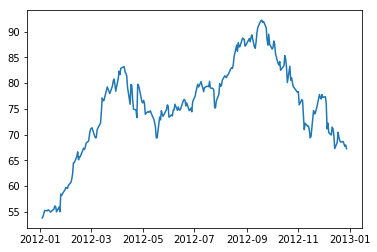

In [198]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.plot(aapl['2012']['Adj Close'])

In [223]:
# Calculate AAPL and MSFT daily returns on Adj Close
combined_df["Daily Return msft"] = combined_df["Adj Closemsft"].diff(1)
combined_df["Daily Return aapl"] = combined_df["Adj Closeaapl"].diff(1)
combined_df["Daily Return aapl"]
combined_df["Daily Return msft"]

Date
2012-01-03         NaN
2012-01-04    0.552143
2012-01-05    0.245398
2012-01-06    0.376861
2012-01-09   -0.324276
2012-01-10    0.087642
2012-01-11   -0.105171
2012-01-12    0.245398
2012-01-13    0.219105
2012-01-17    0.008765
2012-01-18   -0.026294
2012-01-19   -0.096405
2012-01-20    1.393506
2012-01-23    0.017529
2012-01-24   -0.341803
2012-01-25    0.192811
2012-01-26   -0.052584
2012-01-27   -0.236634
2012-01-30    0.333040
2012-01-31   -0.070113
2012-02-01    0.315510
2012-02-02    0.052586
2012-02-03    0.254161
2012-02-06   -0.035056
2012-02-07    0.131463
2012-02-08    0.271689
2012-02-09    0.096407
2012-02-10   -0.236634
2012-02-13    0.070114
2012-02-14   -0.114684
                ...   
2012-11-15   -0.162217
2012-11-16   -0.126169
2012-11-19    0.189253
2012-11-20   -0.018025
2012-11-21    0.216291
2012-11-23    0.675904
2012-11-26   -0.279375
2012-11-27   -0.279373
2012-11-28    0.252338
2012-11-29   -0.369494
2012-11-30   -0.297398
2012-12-03   -0.171229
2012-1

In [201]:
InitialCash = 1000

Position = {'Cash': InitialCash, 'Stocks': 0.0} 

stock_t=[]
cash_t=[]
used_date=[]

def DecideTargetPosition():
    ## Randomly decide a portfolio percentage of inital capital
    return np.random.choice([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.0,1.0])        
        
def Capital(price):
    return Position['Cash'] + Position['Stocks']*price

def PlaceOrder(price):
    p = DecideTargetPosition()
    capital = Capital(price)
        
    numLots = np.floor(capital*p/price)
        
    TargetPosition = {'Cash': capital-numLots*price, 'Stocks': numLots}
        
    if TargetPosition['Stocks'] > Position['Stocks']:
        # Buy 
        order = ('Buy', TargetPosition['Stocks']-Position['Stocks'])
        return order
    elif TargetPosition['Stocks'] < Position['Stocks']:
        # Sell
        order = ('Sell', -TargetPosition['Stocks']+Position['Stocks'])
        return order
    else:
        # Do nothing
        None

def UpdatePosition(deltaCash, deltaStock):
    Position['Cash'] += deltaCash
    Position['Stocks'] += deltaStock
    return